## Проект: "Принятие решений в бизнесе на основе данных"
анализ для интернет-магазина

Задача:
- приоритизировать гипотезы, 
- запустить A/B-тест, 
- проанализировать результаты.



In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import datetime as dt
from math import *

### 1. Предобработка данных

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


In [3]:
hypothesis.describe()

,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


In [4]:
orders = pd.read_csv('/datasets/orders.csv')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [6]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [7]:
orders.duplicated().sum()

0

In [8]:
orders.describe()

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


In [9]:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [10]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [11]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [12]:
visitors.describe()

,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


### Выводы
В данных нет пропусков, не найдено дубликатов.

Все графы, содержащие даты (orders['date'],visitors['date']), хранили данные типа 'object'. В таком формате работать с ними затруднительно. Данные были приведены к типу datetime64 методом dt.datetime.strptime('%Y-%m-%d').

### 2.  Приоритизация гипотез

#### 2.1. Приоретизация гипотез с помощью фреймворка ICE

In [13]:
hypothesis['ice'] = (hypothesis['Impact'] * hypothesis['Confidence'])/hypothesis['Efforts']

In [14]:
hypothesis.sort_values(by = 'ice', ascending = False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ice
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000


Вывод:
При приоретизации гипотез с помощью фреймворка ICE наиболее приоритетными являются гипотезы 8, 0 и 7.

#### 2.2. Приоретизация гипотез с помощью фреймворка RICE

In [15]:
hypothesis['rice'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'])/hypothesis['Efforts']

In [16]:
hypothesis.sort_values(by = 'rice', ascending = False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ice,rice
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


Вывод: 
При приоретизации гипотез с помощью фреймворка ICE наиболее приоритетными являются гипотезы 7, 2 и 0.

### Вывод:
Приоритезация гипотез с помощью фреймворков ICE и RICE показала, что наиболее важными в настоящий момент являются гипотезы 7 и 0.

Так же фреймворк RICE указвает на гипотезу 2, за счет большого охвата изменениями пользователей (8 из 10) при относительно низких трудозатратах на ее реализацию (3 из 10).

Гипотеза 8, которая имеет наивысший приоритет по ICE  оказалась на 5 месте по приоритетам RICE- при высоком влиянии на пользователей и уверенности в данных, охват у данной гипотезы оценен как 1 из 10. В то время как гипотеза 2, оказавшаяся на 5 месте в приоритетах ICE охватывает 80% пользователей, что и сделало эту гипотезу 2ой по значимости в приритетах RICE.

Гипотеза 6 стабильно на 4м месте в обоих фреймворках.

Гипотезы 1,3,4,5 не являются приоритетными при обоих типах оценки. 

### 3. Анализ A/B-теста

#### 3.1 Кумулятивные метрики

In [17]:
datesGroups = orders[['date','group']].drop_duplicates() #массив уникальных пар значений дат и групп теста

In [18]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({
    'date' : 'max', 
    'group' : 'max', 
    'transactionId' : pd.Series.nunique, 
    'visitorId' : pd.Series.nunique, 
    'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])


In [19]:
ordersAggregated.head() # агрегированные кумулятивные по дням данные о заказах

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


In [20]:
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
        'date' : 'max', 
        'group' : 'max',
        'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [21]:
visitorsAggregated.head() #агрегированные кумулятивные по дням данные о посетителях интернет-магазин

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [22]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [23]:
cumulativeData.head(5) # кумулятивные данные в одной таблице  о заказах и о посетителях интернет-магазин

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [24]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


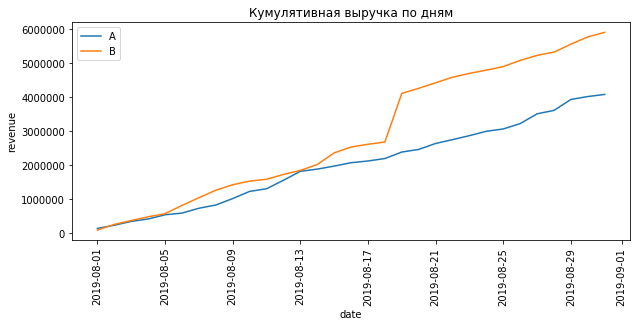

In [25]:
plt.figure(figsize=(10,4))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title("Кумулятивная выручка по дням")
plt.xlabel("date")
plt.ylabel("revenue")
plt.xticks(rotation=90)
plt.legend()

Кумулятивная выручка по дням для группы В больше, чем для группы А. Виден резкий рост выручки 2019-08-19 для группы В. 

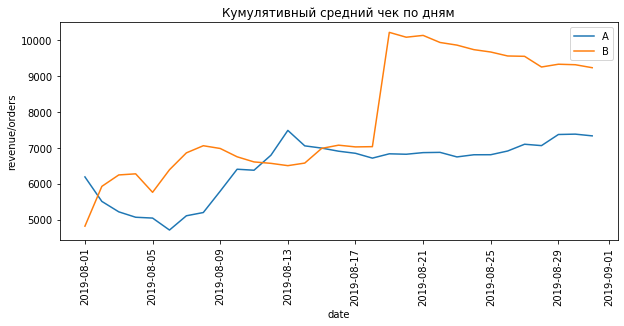

In [26]:
plt.figure(figsize=(10,4))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title("Кумулятивный средний чек по дням")
plt.xlabel("date")
plt.ylabel("revenue/orders")
plt.xticks(rotation=90)
plt.legend()

In [27]:
(cumulativeRevenueB['revenue']/cumulativeRevenueB['orders']).max()

10214.741935483871

Средний чек для группы А примерно стабилизировался к 2019-08-15. С 2019-08-21 по 2019-09-01 средний чек группы А слабо растет, оставаясь в районе 7000. В то время как  средний чек группы В резко вырос 2019-08-19, а после этого до 2019-09-01 установился тренд на стабильное снижение среднего чека. К 2019-09-01 он снизился с примерно 10000 до 9000.

In [28]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, 
    left_on='date', 
    right_on='date', 
    how='left', 
    suffixes=['A', 'B'])

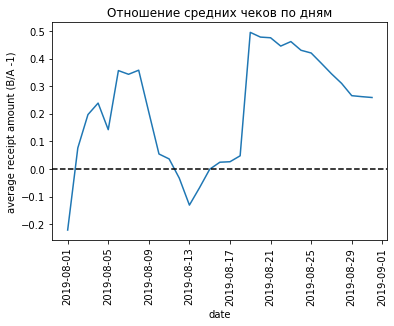

In [29]:
# отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title("Отношение средних чеков по дням")
plt.xlabel("date")
plt.ylabel("average receipt amount (B/A -1)")
plt.xticks(rotation=90)
plt.axhline(y=0, color='black', linestyle='--')

Средний чек группы В все так же нестабилен. Возможно в конце исследования наметилось плато, но данных не хватает для того, чтобы сдеалть окончательный вывод о стабилизации среднего чека в группе В по отношению к группе А.

In [30]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors'] # считаем кумулятивную конверсию
cumulativeData['conversion'].describe() # пределы конверсии для графика

count    62.000000
mean      0.032292
std       0.002190
min       0.029217
25%       0.030190
50%       0.032819
75%       0.034055
max       0.036856
Name: conversion, dtype: float64

In [31]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

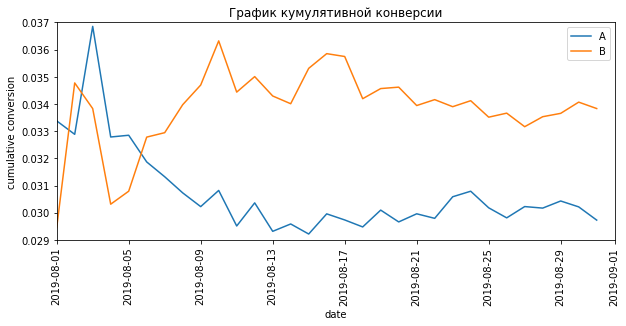

In [32]:
plt.figure(figsize=(10,4))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title("График кумулятивной конверсии")
plt.xlabel("date")
plt.ylabel("cumulative conversion")
plt.xticks(rotation=90)
plt.axis(["2019-08-01", '2019-09-01', 0.029, 0.037])
plt.legend()

Кумулятивная конверсия для группы А колеблется вокруг значения 0.030. В тоже время кумулятивная конверсия группы В все так же прыгает. Возможно стабилизируется возле значения 0.034.  

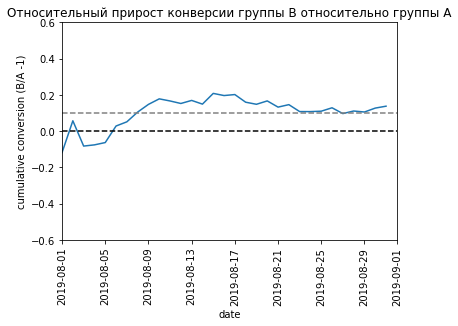

In [33]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], 
    left_on='date', right_on='date', 
    how='left', 
    suffixes=['A', 'B'])

plt.plot(
    mergedCumulativeConversions['date'], 
    mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.title("Относительный прирост конверсии группы B относительно группы A")
plt.xticks(rotation=90)
plt.axis(["2019-08-01", '2019-09-01', -0.6, 0.6])
plt.xlabel("date")
plt.ylabel("cumulative conversion (B/A -1)")
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')


Отношение конверсий выглядит более или менее стабильным. С 2019-08-21 оно держится в районе 0.1. 

#### 3.2. Работа с выбросами.

Text(0, 0.5, 'frequency')

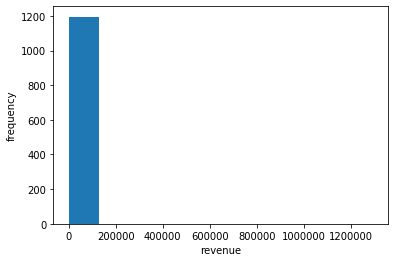

In [34]:
plt.hist(orders['revenue'])
plt.xlabel("revenue")
plt.ylabel("frequency")

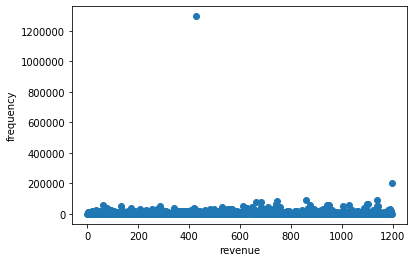

In [35]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.xlabel("revenue")
plt.ylabel("frequency")
plt.show()

In [36]:
print(np.percentile(orders['revenue'], [90, 95, 99]))

[18168.  28000.  58233.2]


Не более 5% заказов совершаются на сумму свыше 28000.

Не более 1% заказов совершается на сумму свыше 58233.2.

In [37]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
# количество заказов по пользователям
ordersByUsers.columns = ['userId','orders']
ordersByUsers.sort_values(by='orders',ascending=False).head(10)

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


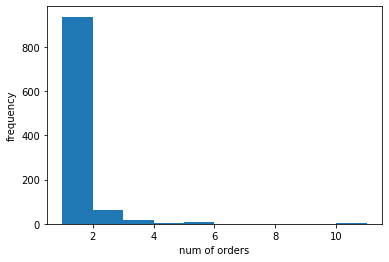

In [38]:
plt.hist(ordersByUsers['orders'])
plt.xlabel("num of orders")
plt.ylabel("frequency")
plt.show()

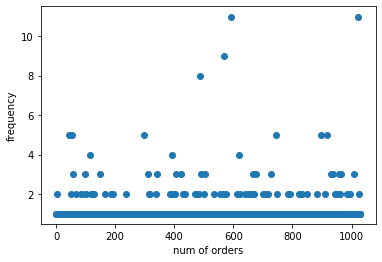

In [39]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.xlabel("num of orders")
plt.ylabel("frequency")
plt.show()

In [40]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


Не более 5% пользователей совершают более 2х заказов.

Не более 1% пользователей совершают более 4х заказов.

#### 3.3 Анализ A/B-теста

In [41]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA'] # таблица визитов в каждый день для группы А

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB'] # таблица визитов в каждый день для группы В

In [42]:
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({
        'date' : 'max', 
        'visitorsPerDateA' : 'sum'
    }), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA'] # таблица кумулятивных визитов по дням для группы А

In [43]:
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({
        'date' : 'max', 
        'visitorsPerDateB' : 'sum'
    }), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB'] # таблица кумулятивных визитов по дням для группы В

In [44]:
ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']].groupby(
    'date', as_index=False).agg({
    'transactionId' : pd.Series.nunique, 
    'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']  # таблица заказов в каждый день для группы А

In [45]:
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg({
        'date' : 'max',
        'ordersPerDateA' : 'sum',
        'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA'] 
# таблица кумулятивных заказов на каждый день для группы А

In [46]:
ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']].groupby(
    'date', as_index=False).agg({
    'transactionId' : pd.Series.nunique, 
    'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB'] # таблица заказов в каждый день для группы В

In [47]:
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg({
        'date' : 'max',
        'ordersPerDateB' : 'sum',
        'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']
# таблица кумулятивных заказов на каждый день для группы В

In [48]:
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

##### 3.3.1 Расчет статистической значимости различия в конверсии и среднем чеке между группами на сырых данных

In [49]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']
# для пользователей группы А, которые заказывали хотя бы 1 раз, посчитано число совершённых заказов.

In [50]:
ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']
# для пользователей группы B, которые заказывали хотя бы 1 раз, посчитано число совершённых заказов.

In [51]:
# для обеих групп созаем переменные, в которых будут содержаться данные о пользователяч из разных групп.
# Им будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [52]:
# относительный прирост конверсии группы B:
print("p-value = {0:.5f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))
print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

p-value = 0.00840
0.138


По сырым данным получена статистическая разница между группами А и В по кумулятивной конверсии. (p-value < 0.01). Разница между средней конверсией групп А и В 13.8% (группа В лидирует)

In [53]:
# относительные различия в среднем чеке между группами
print("p-value = {0:.3f}".format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value = 0.365
0.259


P-value значительно больше 0.05. Нельзя отвергать нулевую гипотезу и считать, что в среднем чеке есть различия. При этом, средний чек группы B выше чека группы A на 0.259.

##### 3.3.2 Фильтрация данных

In [54]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 4]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 4]['userId']], axis = 0)


In [55]:
usersWithExpensiveOrders = orders[orders['revenue'] > 58233.2]['visitorId']

usersWithExpensiveOrders.name = 'userId'

In [56]:
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape)

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
Name: userId, dtype: int64
(15,)


Выявлено 15 аномальных пользователей количество заказов от которых превышало 4, или сумма заказов превышала 58233.2. 

##### 3.3.3 Расчет статистической значимости различия в конверсии и среднем чеке между группами на отфильтрованных данных

In [57]:
# Отфильтрованные сэмпл для групп А и В
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId']\
                                                           .isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA']\
                                                           .sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

In [58]:
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId']\
                                                           .isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB']\
                                                           .sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

In [59]:
print("{0:.5f}".format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.00719
0.153


Получена статистическая разница между группами А и В по кумулятивной конверсии по отфильтрованным данным. (p-value < 0.01). Разница между средней конверсией групп А и В 15.3% (группа В лидирует, разница выше, чем по сырым данным)

In [60]:
print("{0:.5f}".format(st.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.5f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.42546
-0.00575


P-value значительно больше 0.05. Нельзя отвергать нулевую гипотезу и считать, что в среднем чеке есть различия. При этом, средний чек группы B практически равен среднему чеку группы А.(меньше на 0.006)

### Выводы
 1. Приоритезация гипотез с помощью фреймворков ICE и RICE показала, что наиболее важными в настоящий момент являются гипотезы 7 и 0. Так же фреймворк RICE указвает на гипотезу 2, за счет большого охвата изменениями пользователей (8 из 10) при относительно низких трудозатратах на ее реализацию (3 из 10).
 2. Кумулятивная выручка по дням для группы В больше, чем для группы А. Виден резкий рост выручки 2019-08-19 для группы В. Интересно узнать какое событие стимулировало продажи для группы В в этот день (это примерно середина теста). 
 3. Средний чек для группы А примерно стабилизировался к 2019-08-15. С 2019-08-21 по 2019-09-01 средний чек группы А слабо растет, оставаясь в районе 7000. В то время как  средний чек группы В резко вырос 2019-08-19, а после этого до 2019-09-01 установился тренд на стабильное снижение среднего чека. К 2019-09-01 он снизился с примерно 10000 до 9000.
 4. Средний чек группы В нестабилен. Возможно в конце исследования наметилось плато, но данных не хватает для того, чтобы сдеалть окончательный вывод о стабилизации среднего чека в группе В по отношению к группе А.
 5. Кумулятивная конверсия для группы А колеблется вокруг значения 0.030. В тоже время кумулятивная конверсия группы В все так же прыгает. Возможно стабилизируется возле значения 0.034
 6. Отношение конверсий выглядит более или менее стабильным. С 2019-08-21 оно держится в районе 0.1.
 7. Не более 5% заказов совершаются на сумму свыше 28000. Не более 1% заказов совершается на сумму свыше 58233.2.
 8. Не более 5% пользователей совершают более 2х заказов. Не более 1% пользователей совершают более 4х заказов.
 9. Выявлено 15 аномальных пользователей количество заказов от которых превышало 4, или сумма заказов превышала 58233.2. 
 10. По сырым данным получена статистическая разница между группами А и В по кумулятивной конверсии. (p-value < 0.01). Разница между средней конверсией групп А и В 13.8% (группа В лидирует). При этом Нельзя отвергать нулевую гипотезу и считать, что в среднем чеке у групп есть различия. (по сырым данным средний чек группы B выше чека группы A на 0.259).
 11. Получена статистическая разница между группами А и В по кумулятивной конверсии по отфильтрованным данным. (p-value < 0.01). Разница между средней конверсией групп А и В 15.3% (группа В лидирует, разница выше, чем по сырым данным).
 12. Нельзя отвергать нулевую гипотезу и считать, что в среднем чеке есть различия. На отфильтрованных данных, средний чек группы B практически равен среднему чеку группы А.(меньше на 0.006).

### Итог:
##### Учитывая нестабилизировавшиеся графики по кумулятивнм метрикам, а так же отсутствие статистически значимого различия в средних чеках между группами А и В считаю, что тест нужно продолжать. 